# Datan analysointi K2020_2 - Tehtävät kerta 6

Palauta Optiman palautuslaatikkoon viimeistään su 29.3. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

Opiskelijan nimi:

## 1. Sekunnit aikaleimoiksi
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt on gps-koordinaatteja ja niille aikaleimoja:

**t401.444483900_1490796_6272051_S36.**

  * **t401** = laitteen id (merkkijono)
  * **444483900** = UTC-aika sekunteina vuoden 2006 alusta eli 1.1.2006 00:00:00 (kokonaislukuna)
  * **1490796** = pituusaste*50000 (kokonaislukuna)
  * **6272051** = leveysaste*100000 (kokonaislukuna)
  * **S36** = nopeus (km/h) * 10 (kokonaislukuna)
  
laiteid:n jälkeen siis on aina piste ja muissa väleissä alaviiva. Nopeuslukeman edessä on aina kirjain S ja rivin lopussa piste.

Pura tiedosto DataFrameen, jossa on sarakkeet
  * laitteen id
  * aikaleima Timestampina Suomen aikaa joka on tuolloin ollut 2 tuntia edessä UTC-aikaa
  * pituusaste asteina
  * leveysaste asteina
  * nopeus km/h
  
Mallia alusta:
![malli1](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli1.png)

In [1]:
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np
def siisti_nopeus(x):
    return x[1:-1]

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt', 
                 sep='_',
                 names=['aika','pituusaste','leveysaste','nopeus'],
                 converters= {'nopeus':siisti_nopeus}               
                 )

alku = pd.to_datetime('1.1.2006 02:00:00',dayfirst=True)
df['pituusaste'] = df['pituusaste']/50000
df['leveysaste'] = df['leveysaste']/100000
# df['pituusaste'] = df['pituusaste'].astype(str).str.slice(stop=2)+'.'+df['pituusaste'].astype(str).str.slice(start=2)
# df['leveysaste'] = df['leveysaste'].astype(str).str.slice(stop=2)+'.'+df['leveysaste'].astype(str).str.slice(start=2)
df['id']=df['aika'].str.split('.').str.get(0)
df['aika']=df['aika'].str.split('.').str.get(1)
df.set_index('id', inplace=True)
df['nopeus']=df['nopeus'].astype(int)/10
df['aika'] = df['aika'].astype(int)/(60*60*24)
df['aika'] = alku + pd.to_timedelta(df['aika'],'d')
df['aika'] = df['aika'].dt.strftime('%Y-%m-%d %H:%M:%S')
df

,aika,pituusaste,leveysaste,nopeus
id,,,,
t401,2020-02-01 13:44:59,29.81592,62.72051,3.6
t401,2020-02-01 13:45:01,29.81584,62.72052,7.6
t401,2020-02-01 13:45:04,29.81580,62.72054,5.4
t401,2020-02-01 13:45:06,29.81580,62.72054,0.0
t401,2020-02-01 13:45:08,29.81580,62.72054,0.0
...,...,...,...,...
t439,2020-02-01 14:31:34,29.81634,62.71947,0.0
t439,2020-02-01 14:31:37,29.81634,62.71947,0.0
t439,2020-02-01 14:31:39,29.81634,62.71947,0.0


## 2. Jalkapalloa

Lue tiedosto http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt , 
jossa on Valioliigan ottelut kaudesta 1993-1994 tammikuuhun 2020 DataFrameen.

Listaa ensin minä kalenterikuukausina on pelattu eniten otteluita.  
Pitäisi tulla:
```
2017-12    69
2018-12    69
1994-04    68
2001-12    65
2013-12    64
1994-12    64
2006-12    64
```


Selvitä sitten minä **kalenteriviikkoina (ma-su)** on pelattu eniten otteluita.
Yritä saada otsikoitua viikot alkamispäivän mukaan, jolloin tulokseksi pitäisi saada:  
```
1994-12-26    31  
2005-12-26    27  
1993-12-27    27  
1993-08-16    22  
1993-08-23    22  
```
(huomioi että vuodenvaihteessa saman kalenteriviikon päivät ovat usein eri vuosina)

Laske vielä kuinka paljon otteluita on pelattu eri viikonpäivinä:  
```
ma     680
ti     505
ke     912
to      79
pe      99
la    6104
su    1953
```

In [31]:
from pandas.tseries.offsets import DateOffset
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt', 
                 sep=';', parse_dates=['Date'] )
print('-----Eniten otteluita kk-----')
print(df.resample('M',on='Date',kind='period')['HomeTeam'].count().sort_values(ascending=False).head(10))
print('-----Eniten otteluita viikkoina----')
print(df.resample('W',on='Date',label='left',loffset='1d')['HomeTeam'].count().sort_values(ascending=False).head(10))
print('-----Otteluita viikonpäivinä----')
df['DoW'] = df['Date'].dt.dayofweek
df['Day'] = df['Date'].dt.day_name()
df.set_index('Day',inplace=True)
df= df.groupby('Day').size().sort_index()
#df= df.groupby('DoW').size().sort_index()
df
#df = df['DoW'].sort_values()


-----Eniten otteluita kk-----
Date
2018-12    69
2017-12    69
1994-04    68
2001-12    65
2006-12    64
1994-12    64
2013-12    64
2019-12    63
2007-12    61
2014-12    60
Freq: M, Name: HomeTeam, dtype: int64
-----Eniten otteluita viikkoina----
Date
1994-12-25    31
1993-12-26    27
2005-12-25    27
1993-08-15    22
1993-08-22    22
2010-12-26    21
2002-12-22    21
1994-08-21    21
2013-12-22    21
2003-12-21    20
Name: HomeTeam, dtype: int64
-----Otteluita viikonpäivinä----


Day
Friday         99
Monday        680
Saturday     6104
Sunday       1953
Thursday       79
Tuesday       505
Wednesday     912
dtype: int64

# 3. Liigavire
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal1k2020/kerta6/liiga.txt on SM-liigan (nyk. Liiga) 
runkosarjan ottelutukset kaudesta 2010-2011 kauden 2019-2020 maaliskuun alkuun.

huom. -sarakkeessa on merkintä JA tai VL, jos ottelu on ratkennut vasta jatkoajalla tai voittomaalikilpailussa.

Voittanut (enemmän maaleja tehnyt joukkue) saa 3 pistettä ja hävinnyt 0 pistettä, paitsi jos ottelu on 
ratkennut vasta jatkoajalla tai voittomaalikilpailussa, voittanut joukkue saa 2 pistettä ja hävinnyt yhden 
pisteen.

Laske jokaisen JYP:n ottelun kohdalle paljonko JYP on saanut pisteitä edellisestä 15 ottelustaan ja 
piirrä näistä tiedoista piste-viivakaavio, jossa vaaka-akselilla on ottelun päiväys.

(kaavioon tulee siis n. 6 kk katkoja kausien välillä koska runkosarjaotteluia ei pelata huhti-elokuussa)

Malli:
![malli3](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli3.png)

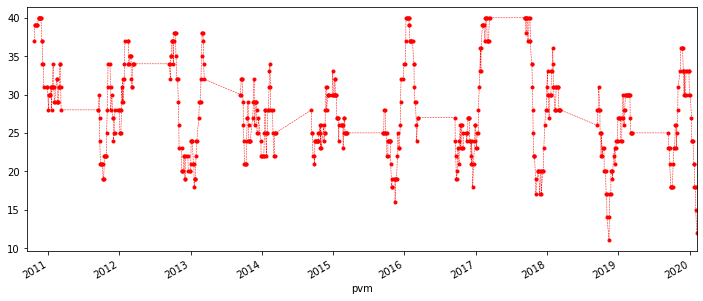

In [1]:
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal1k2020/kerta6/liiga.txt', 
                 sep=',',
                 parse_dates=['pvm'],
                 dayfirst=True,
                 index_col='pvm'
                 )
df['koti']=df['tulos'].str[:1]
df['vieras']=df['tulos'].str[-1:]
df['kotijo']=df['ottelu'].str.split('-').str.get(0)
df['vierasjo']=df['ottelu'].str.split('-').str.get(1)
df['JYPY']=0
# df.loc[df['kotijo']=='JYP','JYPY']='koti'
# df.loc[(df['vierasjo']=='JYP'),'JYPY']='vieras'
df.loc[((df['koti']>df['vieras'])&((df['huom']!=('VL'))|(df['huom']!=('JA')))),'kotip']='3'
df.loc[((df['koti']>df['vieras'])&((df['huom']!=('VL'))|(df['huom']!=('JA')))),'vierasp']='0'

df.loc[((df['vieras']>df['koti'])&((df['huom']!=('VL'))|(df['huom']!=('JA')))),'vierasp']='3'
df.loc[((df['vieras']>df['koti'])&((df['huom']!=('VL'))|(df['huom']!=('JA')))),'kotip']='0'

df.loc[((df['koti']>df['vieras'])&((df['huom']==('VL'))|(df['huom']==('JA')))),'vierasp']='1'
df.loc[((df['vieras']>df['koti'])&((df['huom']==('VL'))|(df['huom']==('JA')))),'kotip']='1'

df.JYPY = df.vierasp.where(df.vierasjo == 'JYP', 0).astype(int)+df.kotip.where(df.kotijo == 'JYP', 0).astype(int)

df2 = df[df['ottelu'].str.contains('JYP')]

df2.resample('D').asfreq()
df2['JYPY'].rolling(15).sum().plot(style='r.--',figsize=(12,5),linewidth=0.5)
plt.show()

## 4. Kilometrit

Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt  on erään kuntoilijan 
päivittäisiä kilometrimääriä kesiltä 2015-2019.

Lue tiedosto ja laske jokaiselle päivälle toukokuun alusta lokakuun loppuun kuinka paljon enemmän 
tai vähemmän vuonna 2019 on kertynyt kilometreja kesän alusta verrattuna vuosiin 2015... 2018. 
Piirrä samaan kaavioon ero jokaiseen aikaisempaan vuoteen.

(huomaa että kilometrejä ei ole kertynyt läheskään jokainen päivä, mutta joka päivälle pitäisi saada ero laskettua)

Malli:
![malli4](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli4.png)

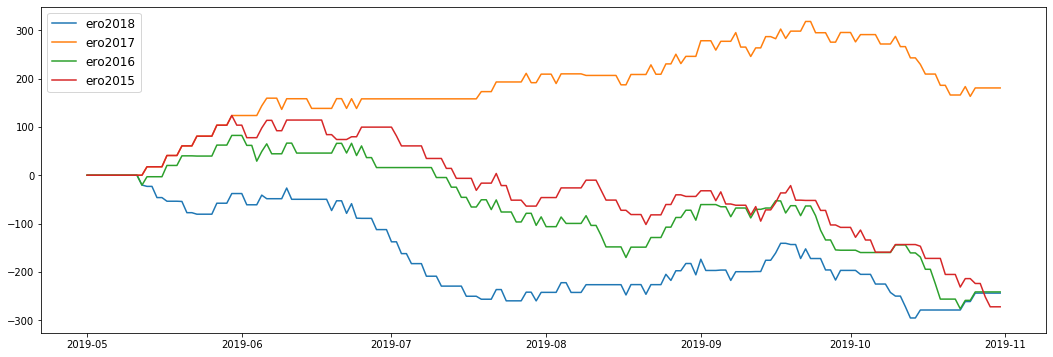

,0,km,ero2018,ero2017,ero2016,ero2015,pvm
index,,,,,,,
2019-05-01,2019-05-01,0.0,0.00,0.00,0.00,0.00,5
2019-05-02,2019-05-02,0.0,0.00,0.00,0.00,0.00,5
2019-05-03,2019-05-03,0.0,0.00,0.00,0.00,0.00,5
2019-05-04,2019-05-04,0.0,0.00,0.00,0.00,0.00,5
2019-05-05,2019-05-05,0.0,0.00,0.00,0.00,0.00,5
...,...,...,...,...,...,...,...
2019-10-27,2019-10-27,0.0,-244.02,180.69,-241.57,-224.10,10
2019-10-28,2019-10-28,0.0,-244.02,180.69,-241.57,-251.73,10
2019-10-29,2019-10-29,0.0,-244.02,180.69,-241.57,-272.37,10


In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt', 
                 sep=',',
                 parse_dates=['pvm'],
                 index_col='pvm'
                 )
df2 = pd.date_range('2019-05-01', '2019-10-31')
df2 = df2.to_frame()
km2019 = df['2019']
df2['km'] = km2019['km']
df2['km'].fillna(0, inplace=True)
df2.reset_index(inplace=True)

v2018 = pd.date_range('2018-05-01', '2018-10-31')
v2018 = v2018.to_frame()
km2018 = df['2018']
v2018['km2018'] = km2018['km']
v2018['km2018'].fillna(0, inplace=True)
v2018.reset_index(inplace=True)
df2['ero2018'] = df2['km'].expanding().sum() - v2018['km2018'].expanding().sum()

v2017 = pd.date_range('2017-05-01', '2017-10-31')
v2017 = v2017.to_frame()
km2017 = df['2017']
v2017['km2017'] = km2017['km']
v2017['km2017'].fillna(0, inplace=True)
v2017.reset_index(inplace=True)
df2['ero2017'] = df2['km'].expanding().sum() - v2017['km2017'].expanding().sum()

v2016 = pd.date_range('2016-05-01', '2016-10-31')
v2016 = v2016.to_frame()
km2016 = df['2016']
v2016['km2016'] = km2016['km']
v2016['km2016'].fillna(0, inplace=True)
v2016.reset_index(inplace=True)
df2['ero2016'] = df2['km'].expanding().sum() - v2016['km2016'].expanding().sum()

v2015 = pd.date_range('2015-05-01', '2015-10-31')
v2015 = v2015.to_frame()
km2015 = df['2015']
v2015['km2015'] = km2015['km']
v2015['km2015'].fillna(0, inplace=True)
v2015.reset_index(inplace=True)
df2['ero2015'] = df2['km'].expanding().sum() - v2015['km2015'].expanding().sum()
df2['pvm'] = df2['index'].dt.month
df2.set_index('index', inplace=True)
plt.figure()
#plt.use_index=False
#plt.xticks([5,6,7,8,9,10,11])
# plt.plot(df2[0],df2.iloc[:,3:],label=('ero2018','ero2017'))
plt.plot(df2[0], df2['ero2018'], label='ero2018')
plt.plot(df2[0], df2['ero2017'], label='ero2017')
plt.plot(df2[0], df2['ero2016'], label='ero2016')
plt.plot(df2[0], df2['ero2015'], label='ero2015')
fig = plt.gcf()
plt.legend(loc='upper left', fontsize='large')
fig.set_size_inches(18,6)
plt.show()
df2

## 5. access.log
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip 
on eräästä access.log-tiedostosta poimittuja tietoja (ip-osoite, aika ja eventid).

Tee tiedoista kaavio, joka kertoo kuinka monta **eri ip-osoitetta** on ollut kussakin 
kuudessa eventissä 5 minuutin jaksoissa näytteistettynä (eli esim montako eri 
ip-osoitetta on välillä 11:30:00-11:34:59).

Voit joutua käyttämään omaa date_parser-funktiota. 

Malli:  
![malli5](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli5.png)

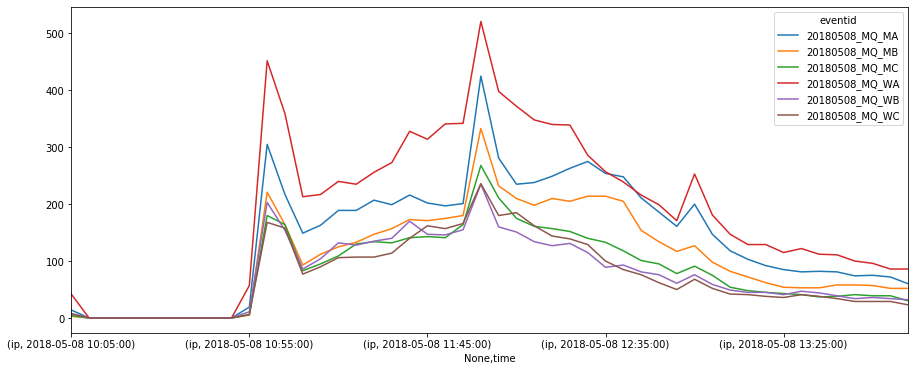

eventid                 20180508_MQ_MA  20180508_MQ_MB  20180508_MQ_MC  \
   time                                                                  
ip 2018-05-08 10:05:00              14               3               4   
   2018-05-08 10:10:00               0               0               0   
   2018-05-08 10:15:00               0               0               0   
   2018-05-08 10:20:00               0               0               0   
   2018-05-08 10:25:00               0               0               0   
   2018-05-08 10:30:00               0               0               0   
   2018-05-08 10:35:00               0               0               0   
   2018-05-08 10:40:00               0               0               0   
   2018-05-08 10:45:00               0               0               0   
   2018-05-08 10:50:00               0               0               0   
   2018-05-08 10:55:00              19               5               6   
   2018-05-08 11:00:00             305             221             180   
   2018-05-08 11:05:00             217             164             164   
   2018-05-08 11:10:00             149              93              83   
   2018-05-08 11:15:00             163             112              95   
   2018-05-08 11:20:00             189             125             109   
   2018-05-08 11:25:00             189             133             130   
   2018-05-08 11:30:00             207             147             134   
   2018-05-08 11:35:00             199             157             132   
   2018-05-08 11:40:00             216             173             141   
   2018-05-08 11:45:00             202             171             143   
   2018-05-08 11:50:00             197             175             141   
   2018-05-08 11:55:00             201             180             164   
   2018-05-08 12:00:00             425             333             268   
   2018-05-08 12:05:00             281             232             211   
   2018-05-08 12:10:00             235             210             175   
   2018-05-08 12:15:00             238             198             161   
   2018-05-08 12:20:00             249             210             157   
   2018-05-08 12:25:00             263             205             152   
   2018-05-08 12:30:00             275             214             140   
   2018-05-08 12:35:00             254             214             133   
   2018-05-08 12:40:00             248             205             118   
   2018-05-08 12:45:00             211             154             101   
   2018-05-08 12:50:00             186             134              95   
   2018-05-08 12:55:00             161             117              78   
   2018-05-08 13:00:00             200             127              91   
   2018-05-08 13:05:00             147              98              75   
   2018-05-08 13:10:00             118              82              54   
   2018-05-08 13:15:00             103              72              48   
   2018-05-08 13:20:00              92              62              45   
   2018-05-08 13:25:00              85              54              43   
   2018-05-08 13:30:00              81              53              41   
   2018-05-08 13:35:00              82              53              37   
   2018-05-08 13:40:00              81              58              38   
   2018-05-08 13:45:00              74              58              41   
   2018-05-08 13:50:00              75              57              39   
   2018-05-08 13:55:00              72              52              39   
   2018-05-08 14:00:00              60              52              30   

eventid                 20180508_MQ_WA  20180508_MQ_WB  20180508_MQ_WC  
   time                                                                 
ip 2018-05-08 10:05:00              42               8               7  
   2018-05-08 10:10:00               0               0               0  
   2018

In [2]:
from dateutil.parser import parse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

newparser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y:%H:&M:%S")
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip', 
                 sep=',',
                 parse_dates=['timestamp']
                 )      

df['time'] = pd.to_datetime(df['timestamp'].str.split(':').str.get(0)+" "+df['timestamp'].str.split('8:').str.get(1))
# df['timestamp']=df['timestamp'].str.split(':').str.get(0).str.replace(":0","")
df.set_index('time',inplace=True)

df2 = pd.DataFrame(df.groupby('eventid').resample('5min')['ip'].nunique())
#df2.reset_index()
df2 = df2.unstack()
df2=df2.T
#df2=df2.unstack()
df2.plot(stacked=False,figsize=(15,6))
plt.xticks()
plt.show()

df2